<a href="https://colab.research.google.com/github/MumbuaFaithK/ai-and-data-projects/blob/main/Data_Wrangling(Faith_Mumbua)_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load and Preview the Dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/student_wellbeing_final.csv')
df.head()

,StudentID,Name,Age,Gender,Program,GPA,StudyHours,SleepHours,ExerciseHours,SocialMediaHours,MoodLevel,StressLevel,AttendanceRate (%)
0,1001,Robert,24,M,Applications,2.73,10.0,6.0,6.0,5,10,6,92.80
1,1002,Jennifer,32,F,Applications,NaN,19.0,6.0,4.0,4,2,3,87.80
2,1003,Charles,28,M,Applications,2.89,1.0,9.0,0.0,5,9,9,81.30
3,1004,Robert,25,M,Applications,3.19,14.0,9.0,5.0,6,10,7,77.95
4,1005,Joseph,24,NaN,Data Science,2.28,13.0,8.0,4.0,1,5,1,NaN


# 2. Identify and Summarize Missing Values

In [ ]:
df.isnull().sum()

,0
StudentID,0
Name,0
Age,0
Gender,34
Program,0
GPA,24
StudyHours,24
SleepHours,24
ExerciseHours,24
SocialMediaHours,0


# 3. Handle Missing Values

In [ ]:
# Fill Gender with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Fill numerical columns with mean
columns_to_fill = ['GPA', 'StudyHours', 'SleepHours', 'ExerciseHours', 'AttendanceRate (%)']
for col in columns_to_fill:
    df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-4-1669090477.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-4-1669090477.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
df.isnull().sum()

,0
StudentID,0
Name,0
Age,0
Gender,0
Program,0
GPA,0
StudyHours,0
SleepHours,0
ExerciseHours,0
SocialMediaHours,0


# 4. Convert Data Types

In [ ]:
# Rename attendance column for easier access
df.rename(columns={'AttendanceRate (%)': 'AttendanceRate'}, inplace=True)

# Check data types
print(df.dtypes)

# Convert categorical columns to category
df['Gender'] = df['Gender'].astype('category')
df['Program'] = df['Program'].astype('category')

StudentID             int64
Name                 object
Age                   int64
Gender               object
Program              object
GPA                 float64
StudyHours          float64
SleepHours          float64
ExerciseHours       float64
SocialMediaHours      int64
MoodLevel             int64
StressLevel           int64
AttendanceRate      float64
dtype: object


# 5. Compute Letter Grades

In [ ]:
df['Grade'] = (df['GPA'] / 4.0) * 100
def get_letter_grade(grade):
    if grade >= 90: return 'A'
    elif grade >= 85: return 'A-'
    elif grade >= 80: return 'B+'
    elif grade >= 75: return 'B'
    elif grade >= 70: return 'B-'
    elif grade >= 65: return 'C+'
    elif grade >= 60: return 'C'
    elif grade >= 55: return 'C-'
    elif grade >= 50: return 'D+'
    elif grade >= 45: return 'D'
    elif grade >= 40: return 'D-'
    else: return 'F'

df['LetterGrade'] = df['Grade'].apply(get_letter_grade)
print(df['LetterGrade'])

0      C+
1      B-
2      B-
3       B
4      C-
       ..
295    C+
296    B-
297    B-
298     B
299     A
Name: LetterGrade, Length: 300, dtype: object


# 6. Compute Wellbeing Score

In [ ]:
# Normalize each metric to 0–1
df['SleepScore'] = df['SleepHours'] / 9       # Max healthy sleep = 9 hrs
df['ExerciseScore'] = df['ExerciseHours'] / 7 # Max healthy exercise = 7 hrs
df['MoodScore'] = df['MoodLevel'] / 10
df['StressScore'] = 1 - (df['StressLevel'] / 10)  # Inverse because high stress is bad
df['SocialMediaScore'] = 1 - (df['SocialMediaHours'] / 8)  # Inverse
df['StudyScore'] = df['StudyHours'] / 20     # Max study = 20 hrs

# Compute weighted average and scale to 0–100
df['WellbeingScore'] = (
    0.2 * df['SleepScore'] +
    0.2 * df['ExerciseScore'] +
    0.2 * df['MoodScore'] +
    0.2 * df['StressScore'] +
    0.1 * df['SocialMediaScore'] +
    0.1 * df['StudyScore']
) * 100

In [ ]:
df[['WellbeingScore']].describe()

,WellbeingScore
count,300.000000
mean,53.904581
std,11.616828
min,20.361111
25%,45.022839
50%,54.938492
75%,62.455271
max,81.285714


# 7. Exploratory Data Analysis

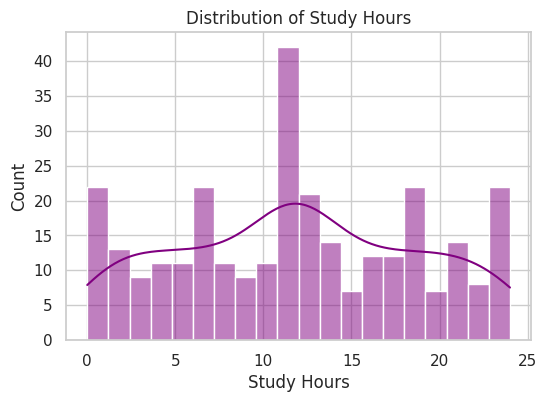

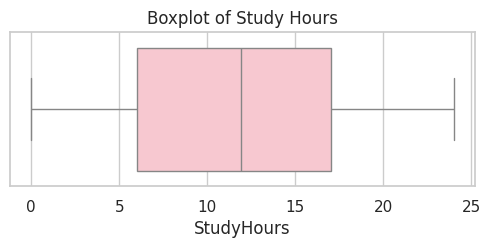

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot 1: Histogram for Study Hours
plt.figure(figsize=(6,4))
sns.histplot(df['StudyHours'], bins=20, kde=True, color='purple')
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Count')
plt.show()

# Plot 2: Boxplot for Study Hours
plt.figure(figsize=(6,2))
sns.boxplot(x=df['StudyHours'], color='pink')
plt.title('Boxplot of Study Hours')
plt.show()

# A. Scatterplots

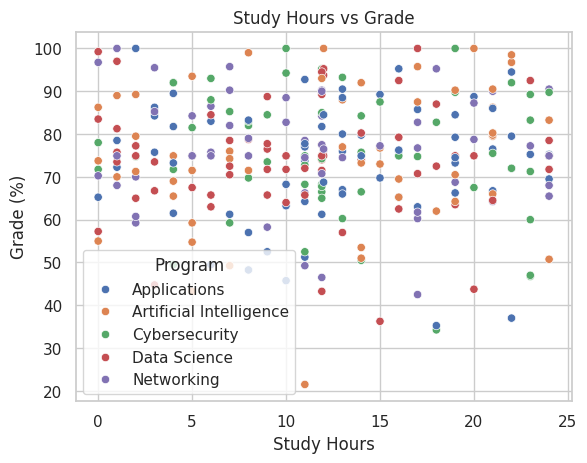

In [ ]:
# Scatterplot: Study Hours vs Grade
sns.scatterplot(data=df, x='StudyHours', y='Grade', hue='Program')
plt.title('Study Hours vs Grade')
plt.xlabel('Study Hours')
plt.ylabel('Grade (%)')
plt.show()

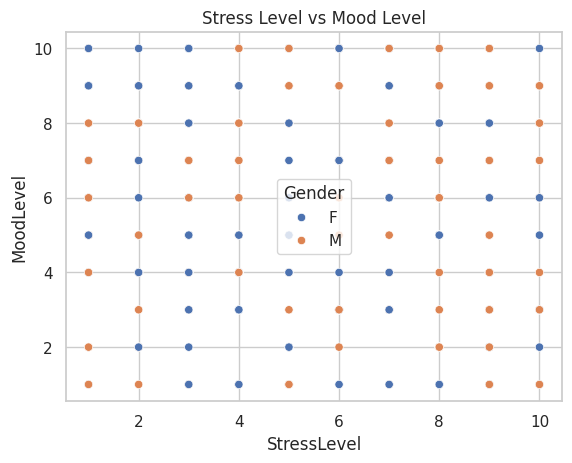

In [ ]:
# Stress vs Mood
sns.scatterplot(data=df, x='StressLevel', y='MoodLevel', hue='Gender')
plt.title('Stress Level vs Mood Level')
plt.show()

# B. Correlation Matrix + Heatmap

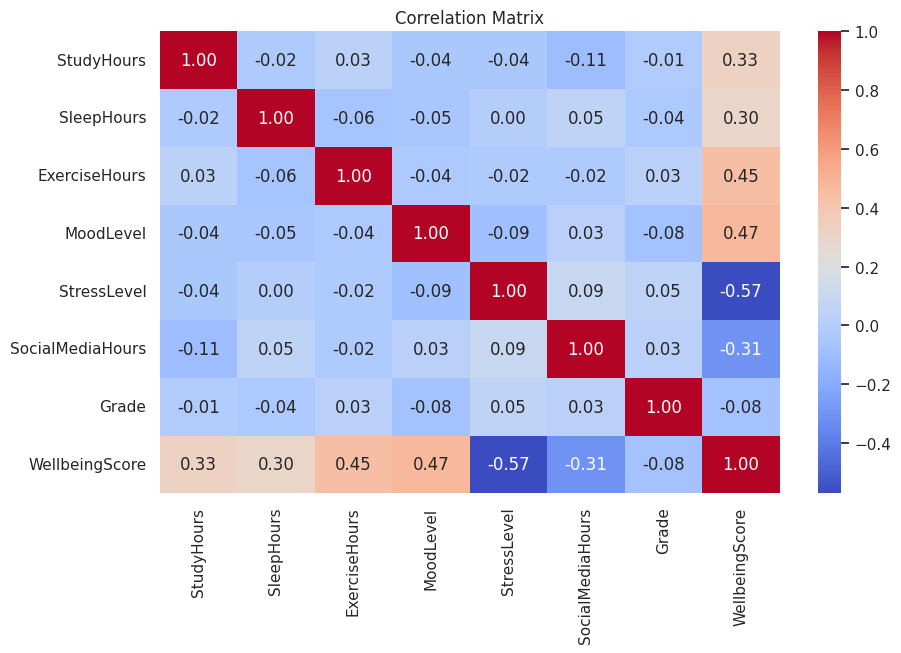

In [ ]:
# Compute correlation matrix
correlation = df[['StudyHours', 'SleepHours', 'ExerciseHours', 'MoodLevel',
                  'StressLevel', 'SocialMediaHours', 'Grade', 'WellbeingScore']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# C. Pair Plot

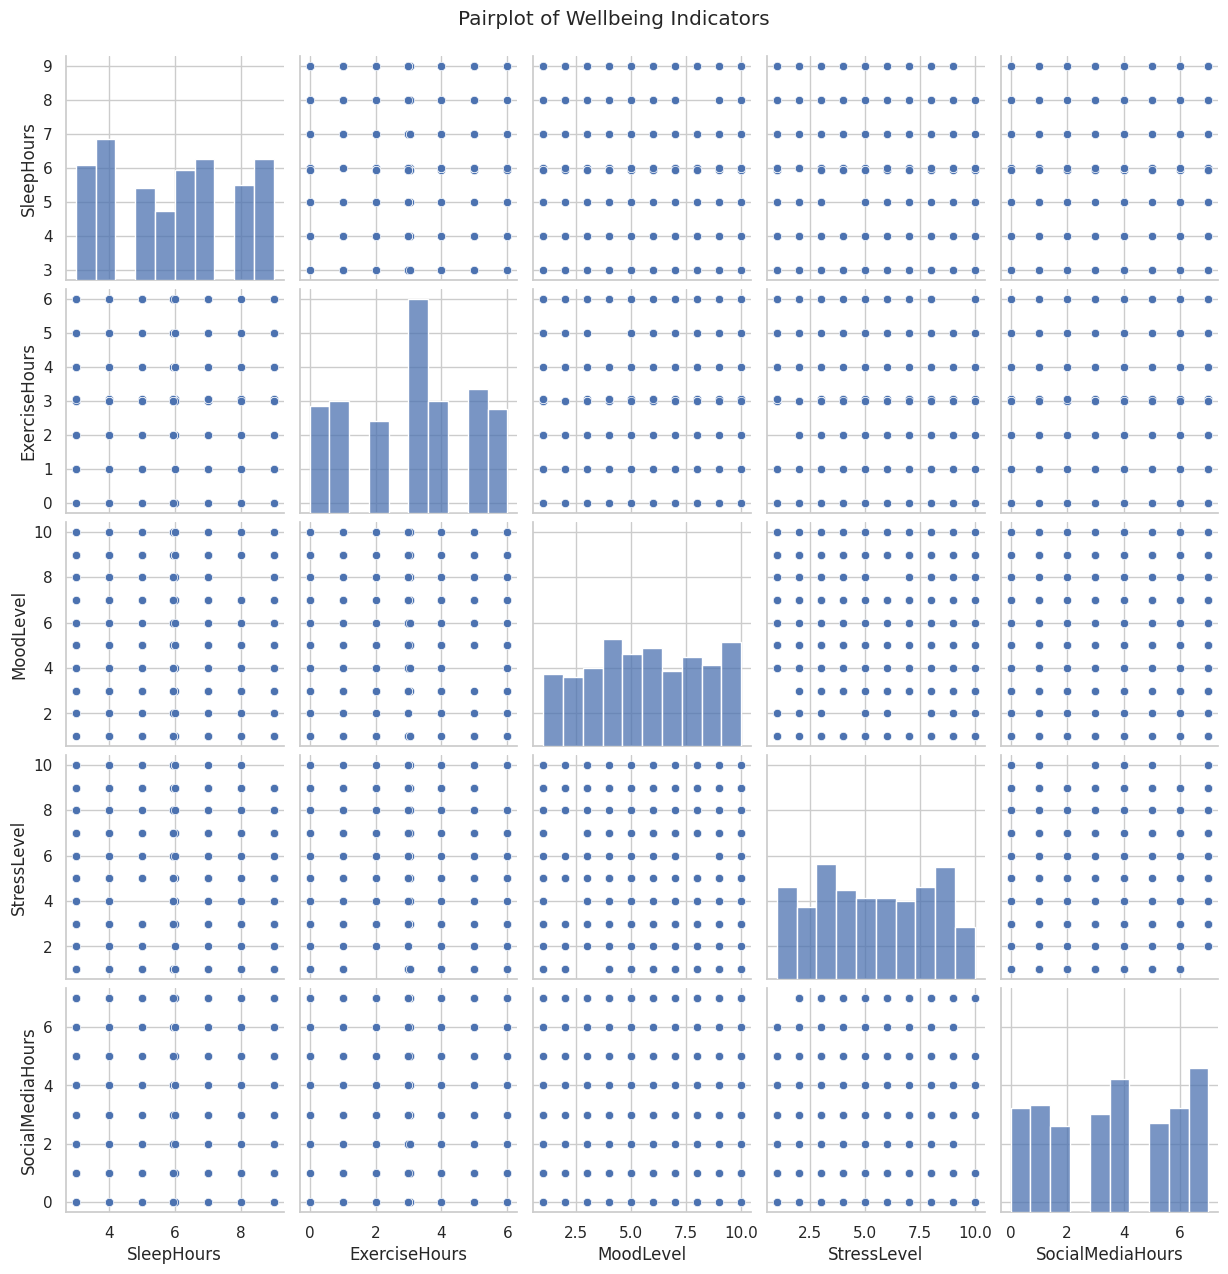

In [ ]:
sns.pairplot(df[['SleepHours', 'ExerciseHours', 'MoodLevel', 'StressLevel', 'SocialMediaHours']])
plt.suptitle('Pairplot of Wellbeing Indicators', y=1.02)
plt.show()

# Grade by Program (Boxplot)

/tmp/ipython-input-17-1613157512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Program', y='Grade', palette='Set2')


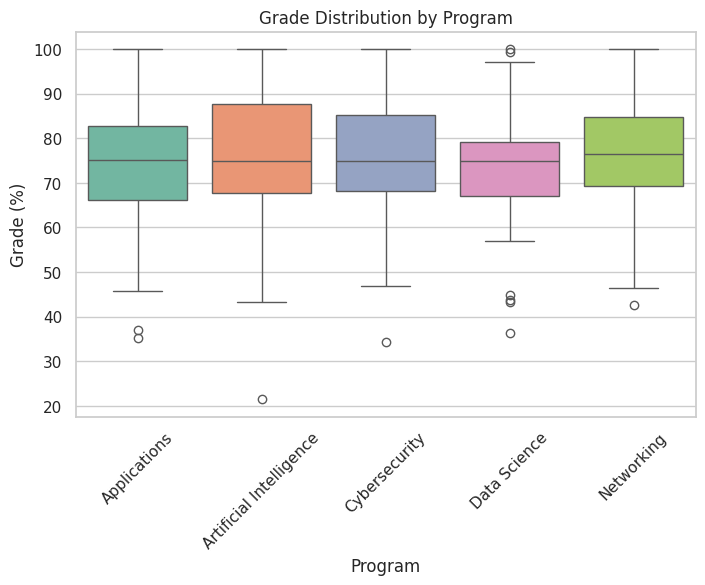

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Program', y='Grade', palette='Set2')
plt.title('Grade Distribution by Program')
plt.xticks(rotation=45)
plt.ylabel('Grade (%)')
plt.show()

# Grade by Gender (Boxplot)

/tmp/ipython-input-18-1561304533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Grade', palette='Set1')


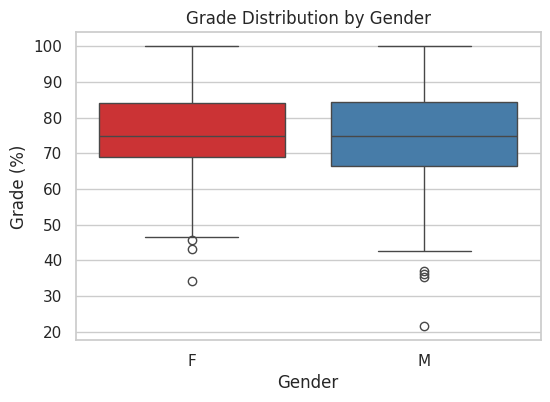

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Gender', y='Grade', palette='Set1')
plt.title('Grade Distribution by Gender')
plt.ylabel('Grade (%)')
plt.show()

In [ ]:
df.to_csv("cleaned_data.csv", index=False)